*Luis Antonio Ortega Andrés*    
*Antonio Coín Castro*

# Cuestiones previas

**Pregunta 1.** Dado que el redondeo en base 10 de la suma de dos números es $\pm 0,5\epsilon$, y que el dígito eliminado es aleatorio, ¿podemos suponer que el redondeo es una variable aleatoria uniforme?

Sí, tiene sentido suponerlo ya que el dígito eliminado se considera aleatorio y no pesa más uno u otro.

**Pregunta 2.** Si dibujo la gráfica del error por redondeo ¿Cómo debería ser dicha gráfica?

Intuitivamente debería formar una nube de puntos, una especie de entorno tubular alrededor de la recta $y=0$, porque a veces el error será por exceso y otras por defecto, pero de manera uniforme.

**Pregunta 3.** Si asumimos que el error de redondeo es una variable aleatoria uniforme entre $-0,5\epsilon$ y $+0,5\epsilon$. ¿Cuál debería ser error absoluto promedio de la suma (o el producto) de un número elevado de números en coma flotante? Da una respuesta razonada.

El error que se comete al sumar dos números es el mismo que el que se comete al multiplicarlos; en ambos casos es la suma de los errores individuales de cada operando. Dado que tenemos varios números en coma flotante, y para cada uno el error varía en $[-0.5\epsilon, 0.5\epsilon]$ de manera uniforme, el error acumulado tenderá a anularse y valer 0, ya que "se compensan" los errores por exceso y los errores por defecto. Formalmente, la esperanza de la suma de variables aleatorias con media 0 tiene también media 0.

# Ejercicios

In [13]:
import matplotlib.pyplot as plt
import numpy as np

i = np.arange(800)

**A.** Implementad en Python la siguiente función racional:

$$f(x)=\frac{4x^4-59x^3+324x^2-751x+622}{x^4-14x^3+72x^2-151x+112}.$$

Representad el valor de la función anterior para los valores de $x=1,606+2^{-52}i$ con $i=0,1, \dots, 800$.

¿Sale una figura continua? ¿Por qué? ¿Puedes explicar el patrón que sale? ¿Qué consecuencias puedes sacar sobre el redondeo?.

In [14]:
f1 = lambda x: (4*x**4 - 59*x**3 + 324*x**2-751*x + 622)/(x**4 - 14*x**3+72*x**2-151*x + 112)

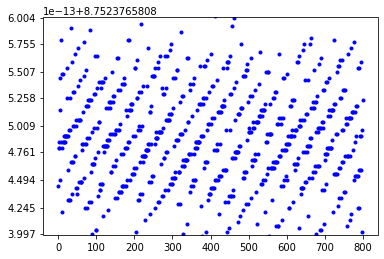

In [15]:
plt.plot(i, f1(1.606 + 2**(-52)*i), 'b.')
plt.ylim(8.7523765807784, 8.7523765807786)
plt.show()

No sale una figura continua; salen una especie de bandas que se acumulan en un patrón diagonal. Debería salir una figura continua ya que la función es continua (el denominador no tiene raíces reales), y habíamos visto de forma teórica que el error de redondeo debería ser uniforme, luego no deberían aparecer patrones. Sin embargo, esto no es lo que observamos en la práctica, lo que nos lleva a pensar que en realidad el redondeo no puede considerarse como una variable aleatoria uniforme, sino que empíricamente tiene una distribución distinta.

**B. Aplicación de la regla de Horner:** Implementad en Python la siguiente función: 

$$f(x)=\frac{622+x(−751+x(324+x(−59+4x)))}{112+x(−151+x(72+x(−14+x)))}.$$

Representad el valor de la función anterior para los mismos valores de $x$. ¿Observas alguna diferencia con la gráfica anterior?

In [6]:
f2 = lambda x: (622+x*(-751+x*(324+x*(-59+4*x))))/(112+x*(-151+x*(72+x*(-14+x))))

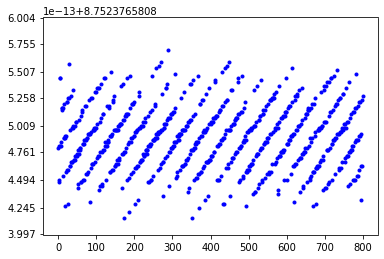

In [7]:
plt.plot(i, f2(1.606 + 2**(-52)*i), 'b.')
plt.ylim(8.7523765807784, 8.7523765807786)
plt.show()

En este caso seguimos observando los patrones diagonales, pero el error se ha reducido ligeramente y los valores se concentran más en torno al centro de la gráfica, como nos gustaría.

**C. Un poquito de análisis previo:** Finalmente implementad ahora la siguiente función:

$$f(x)=4-\frac{3(x-2)[(x-5)^2+4]}{x+(x-2)^2[(x-5)^2+3]}.$$

Representad el valor de la función anterior para los mismos valores de $x$. ¿Observas alguna diferencia con las gráficas anteriores?

In [10]:
f3 = lambda x: 4 - (3*(x-2)*((x-5)**2 + 4))/(x+ ((x-2)**2)*(((x-5)**2) + 3))

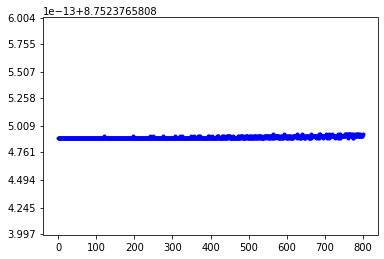

In [11]:
plt.plot(i, f3(1.606 + 2**(-52)*i), 'b.')
plt.ylim(8.7523765807784, 8.7523765807786)
plt.show()

Ahora se observa que los valores se acumulan aproximadamente en una recta, y el error se reduce mucho. Ya no se observan los patrones diagonales.

# Cuestiones

A la vista de las gráficas, responded las siguientes cuestiones.

1) ¿Las tres funciones que hemos pintado son la misma función, solo que escrita de diferente manera? Da una respuesta razonada.

2) ¿Podemos afirmar ahora que la distribución del error por redondeo es una variable aleatoria uniforme?

3) Comenta los resultados obtenidos.

Las tres funciones que hemos pintado son la misma función, escrita de diferentes maneras. Hemos ido reescribiéndola con "trucos" para ir disminuyendo el error, por ejemplo evitando el cálculo de potencias, que ya vimos que era una importante fuente de errores.

A la luz de los resultados obtenidos, no podemos afirmar que la distribución del error por redondeo sea una variable aleatoria uniforme, ya que hemos comprobado que los valores que observamos no son aleatorios, sino que forman un cierto patrón.

En un trabajo sobre números aleatorios ([aquí](https://www.inf.utfsm.cl/~hallende/bajadas/RIV-numeros-aleatorios-06.pdf)) se explica que los números aleatorios, cuando no son realmente aleatorios, se acumulan en hiperplanos, que al proyectarse forman los patrones diagonales que hemos observado en las gráficas. El hecho de ver estos patrones en nuestros experimentos refuerza la idea que comentábamos de que realmente el error no puede considerarse como una variable aleatoria uniforme.

# Apartado extra

Dibujad ahora las mismas gráficas para valores de $x=2,4+2^{-52}i$ con $i=0,1,\dots,800$.

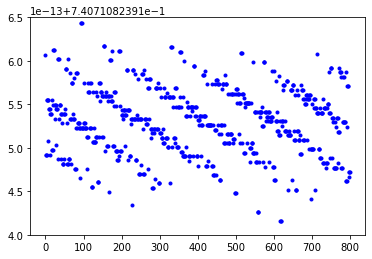

In [15]:
plt.plot(i, f1(2.4 + 2**(-52)*i), 'b.')
plt.ylim(.7407108239094,.74071082390965)
plt.show()

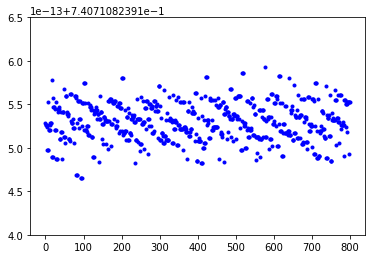

In [18]:
plt.plot(i, f2(2.4 + 2**(-52)*i), 'b.')
plt.ylim(.7407108239094,.74071082390965)
plt.show()

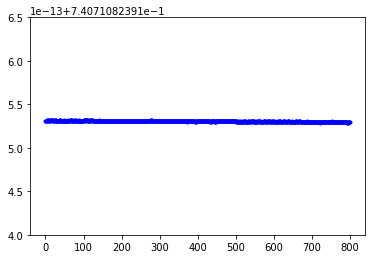

In [17]:
plt.plot(i, f3(2.4 + 2**(-52)*i), 'b.')
plt.ylim(.7407108239094,.74071082390965)
plt.show()

¿Qué cambio has observado? ¿Podrías explicar por qué ha cambiado la dirección del patrón?

Se observa cómo los resultados en las tres gráficas son similares a los anteriores, pero ahora en las dos primeras cambia la dirección del patrón.

No solo la distribución del error no es uniforme, sino que además no es la misma para todos los puntos. En este caso al variar un poco los valores de la $x$ ha cambiado de dirección el patrón (los hiperplanos sobre los que se acumula el error han cambiado, y nosotros vemos la nueva proyección). Una posible explicación para este cambio es que en los casos anteriores estábamos evaluando la función en torno a un máximo (aproximadamente el punto $1.606$), y ahora hemos cambiado y nos movemos cerca de un mínimo ($\approx 2.4$), lo que puede hacer que la forma del error cambie.